<a href="https://colab.research.google.com/github/abiflynn/data_analysis_python/blob/main/data_exploration/data_visualisation_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation with Seaborn

In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Challenge 1:
Make a plot that shows the number of passengers who survived and the number who died. Divide this data by sex and class. Feel free to play around with other parameters such as height and palette too.

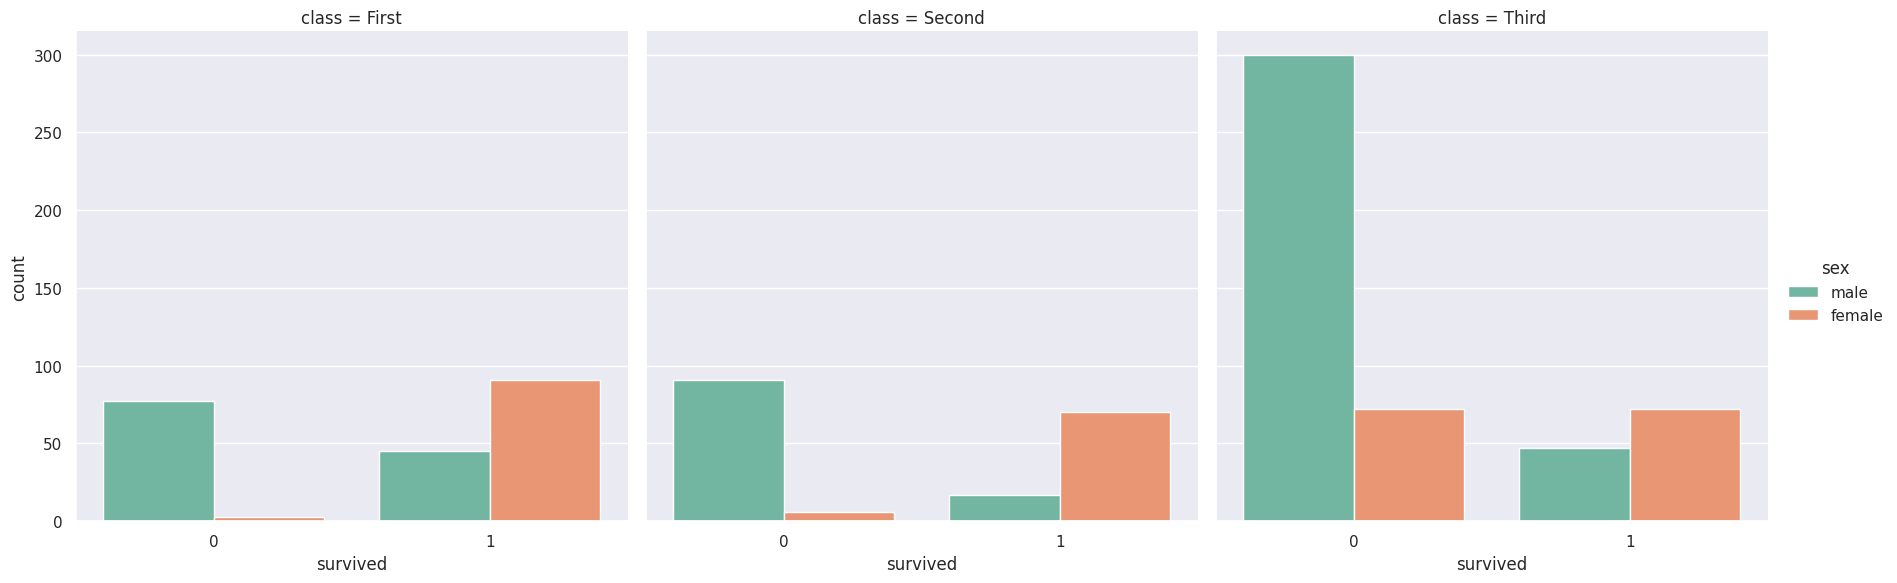

In [5]:
sns.set(font_scale=1)


sns.catplot(kind="count",
            data=titanic, 
            x="survived", 
            hue="sex", 
            col="class", 
            height=6, 
            palette="Set2");

# Loading Eniac

In [6]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

# Challenges:
Let's start combining some of the skills we've learnt with `.groupby()`, `datetime`, and `seaborn` (no pandas plotting this time, please use seaborn). 

Sometimes you may have to make a smaller DataFrame to help Seaborn. Here's a quick example of one way to plot the top 10 brands based on the amount of products sold.

In [7]:
ol_df = orderlines_qu.copy()

In [8]:
ol_df["short"] = ol_df["sku"].str[:3]

In [9]:
ol_with_brands_df = ol_df.merge(brands, 
                                how="left", 
                                on="short")
ol_with_brands_df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple


In [10]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


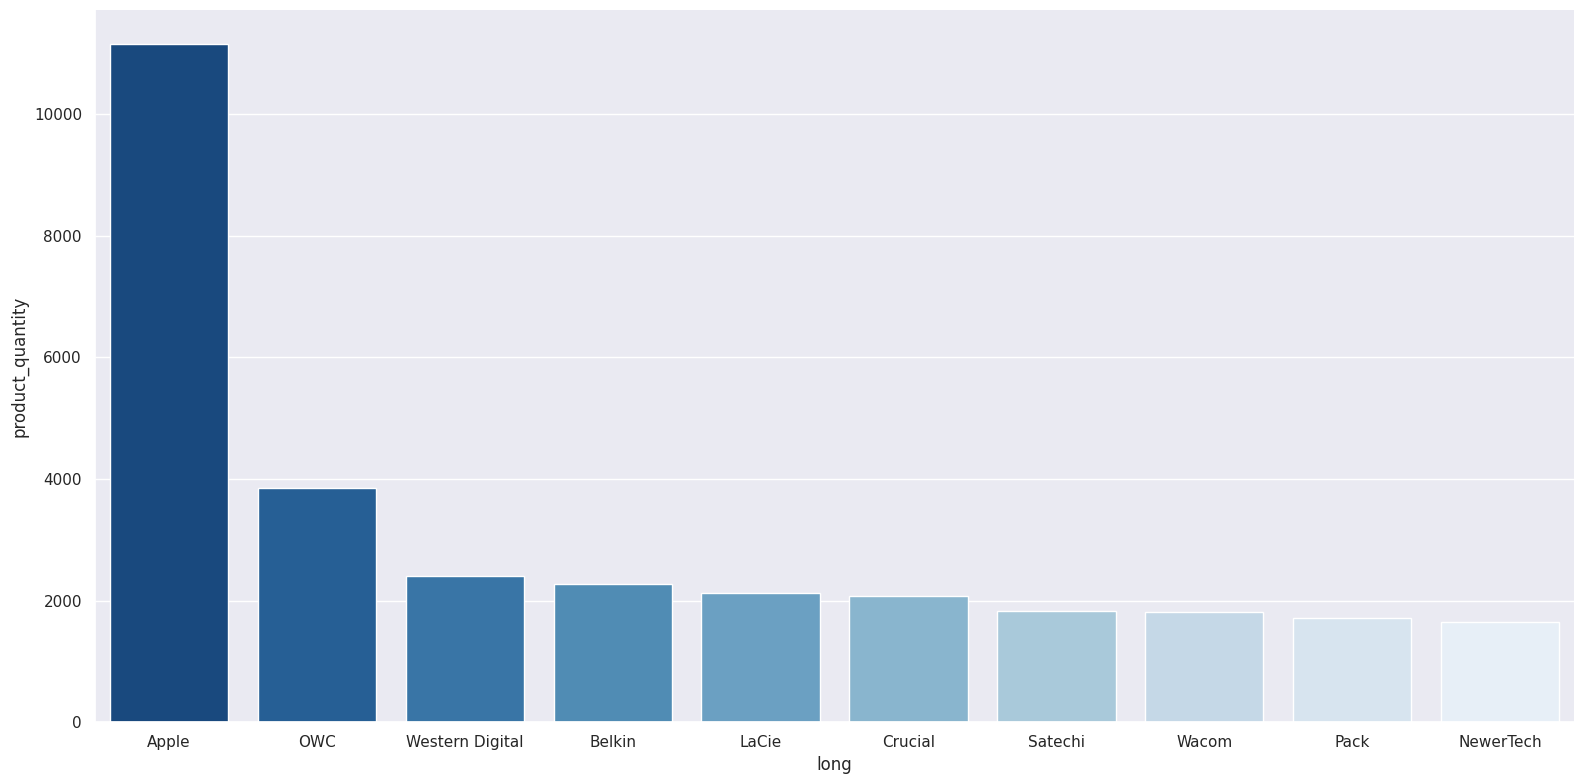

In [11]:
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

## Challenge 2:
Create a scatter plot to explore the relationship between the recommended price for a product (`products.price`) and the price that products actually sold for (`orderlines.unit_price`)

**Hint:** You don't need to groupby here. Just bring a couple of tables together and then use seaborn.

In [12]:
ol_df = orderlines_qu.copy()

In [13]:
ol_with_products_df = ol_df.merge(products_cl, 
                                  how="left", 
                                  on="sku")

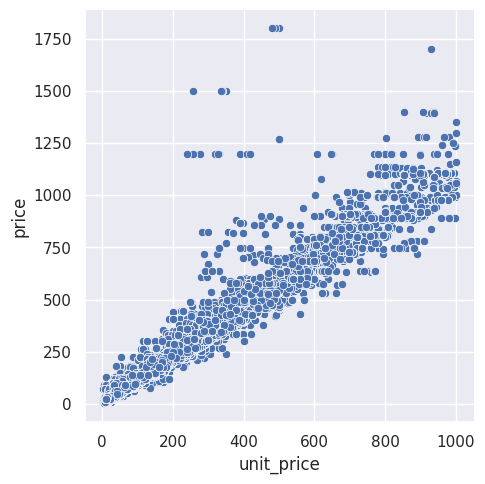

In [14]:
sns.relplot(data=ol_with_products_df,
           x="unit_price",
           y="price");

In [15]:
import matplotlib.pyplot as plt

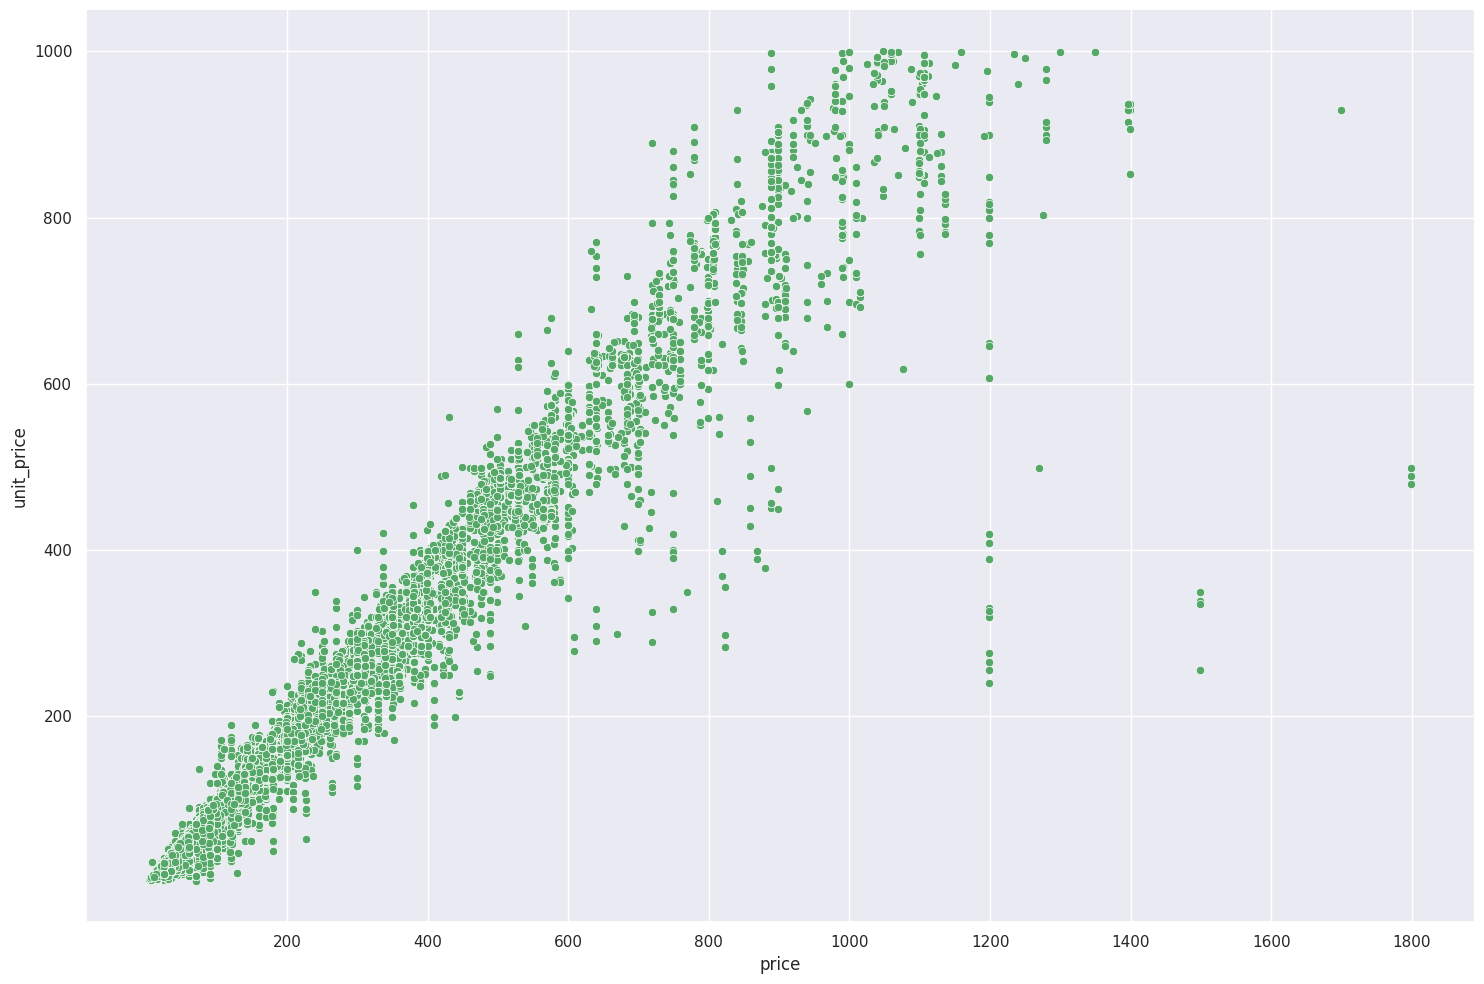

In [16]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           height=10,
           aspect=1.5,
           color="g");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000]);

In [17]:
ol_with_products_df["higher_same_lower"] = "same price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] > ol_with_products_df["price"], "higher_same_lower"] = "higher price"
ol_with_products_df.loc[ol_with_products_df["unit_price"] < ol_with_products_df["price"], "higher_same_lower"] = "lower price"

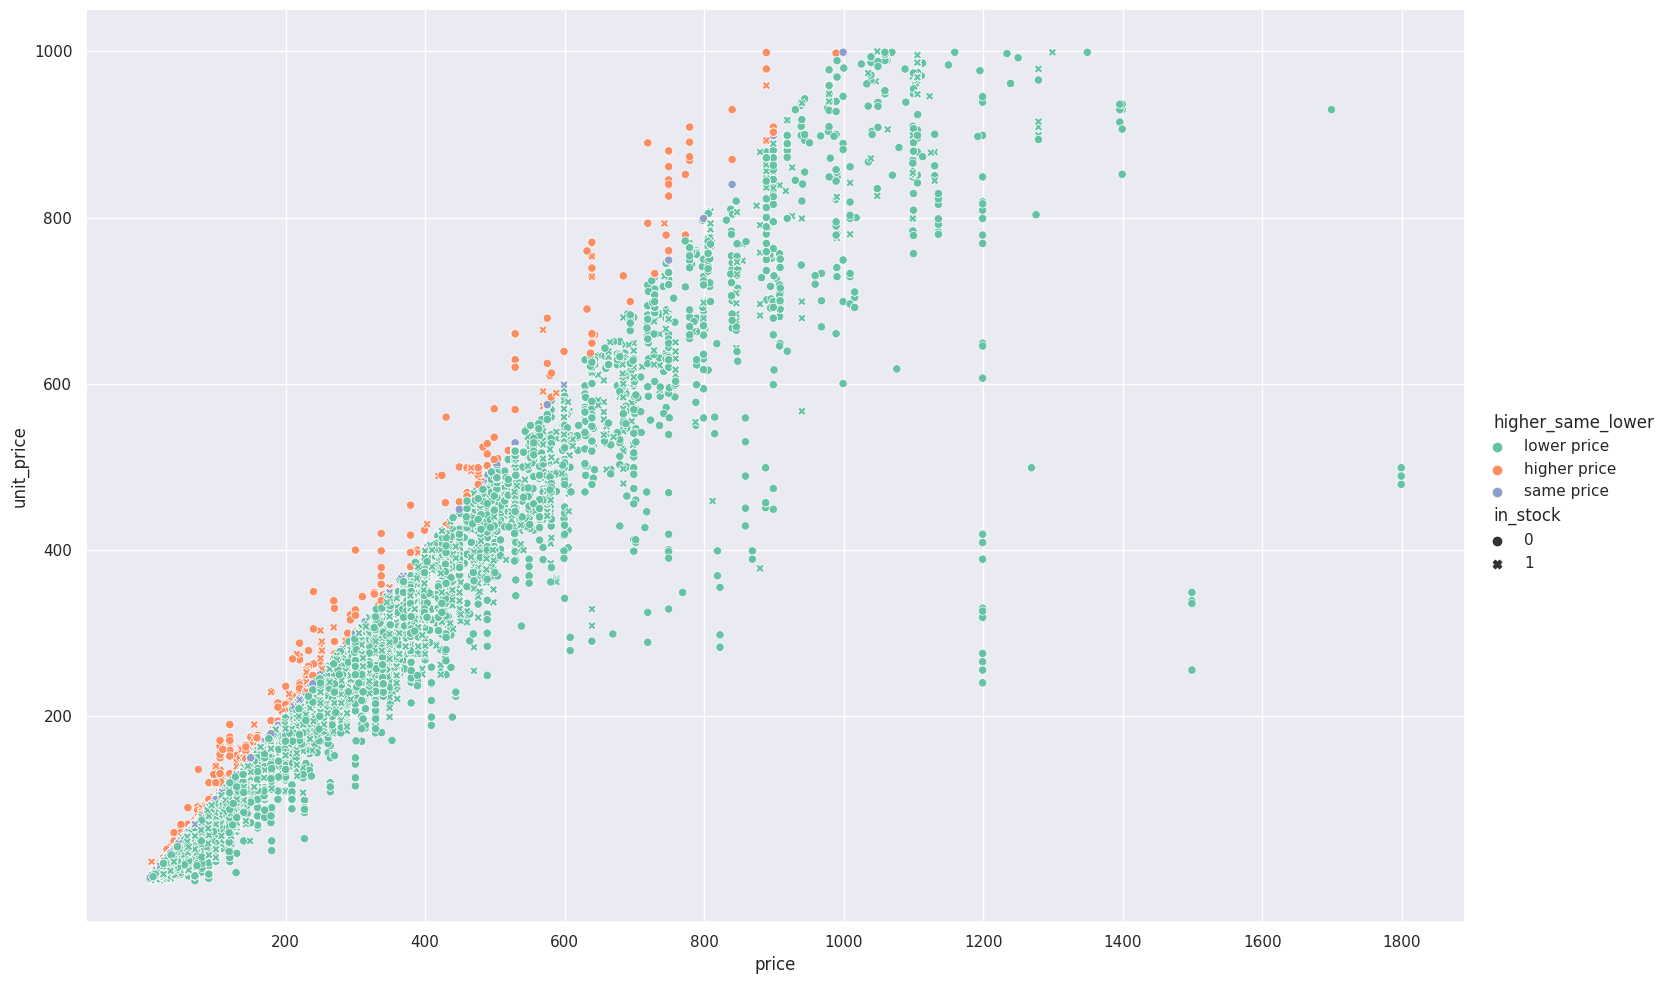

In [18]:
sns.relplot(data=ol_with_products_df,
           x="price",
           y="unit_price",
           hue="higher_same_lower",
           style="in_stock",
           height=10,
           aspect=1.5,
           palette="Set2");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000]);

## Challenge 3:
Let's investigate when customers like to spend more money. Display the average daily price of an order on a line plot.

**Hint:** first work on finding the daily average of `total_paid`, make sure you have this saved as a DataFrame, then work on your plot using this DataFrame.

In [19]:
o_df = orders_qu.copy()

In [20]:
daily_average_df = o_df.groupby(["order_id", "created_date"], as_index=False).agg({"total_paid":"mean"})

In [21]:
daily_average_df

,order_id,created_date,total_paid
0,241423,2017-11-06 13:10:02,136.15
1,242832,2017-12-31 17:40:03,15.76
2,243330,2017-02-16 10:59:38,84.98
3,245275,2017-06-28 11:35:37,149.00
4,245595,2017-01-21 12:52:47,112.97
...,...,...,...
40980,527042,2018-03-14 11:47:50,18.98
40981,527070,2018-03-14 11:50:48,24.97
40982,527074,2018-03-14 11:51:42,24.97
40983,527096,2018-03-14 11:58:40,34.96


In [22]:
daily_average_df["created_date"] = pd.to_datetime(daily_average_df["created_date"])

In [23]:
daily_average_df = daily_average_df.groupby(daily_average_df.created_date.dt.date).agg({"total_paid":"mean"}).reset_index()

In [24]:
daily_average_df

,created_date,total_paid
0,2017-01-01,174.867813
1,2017-01-02,134.554561
2,2017-01-03,137.966069
3,2017-01-04,148.123217
4,2017-01-05,100.327302
...,...,...
433,2018-03-10,161.037963
434,2018-03-11,150.514921
435,2018-03-12,197.944240
436,2018-03-13,155.600465


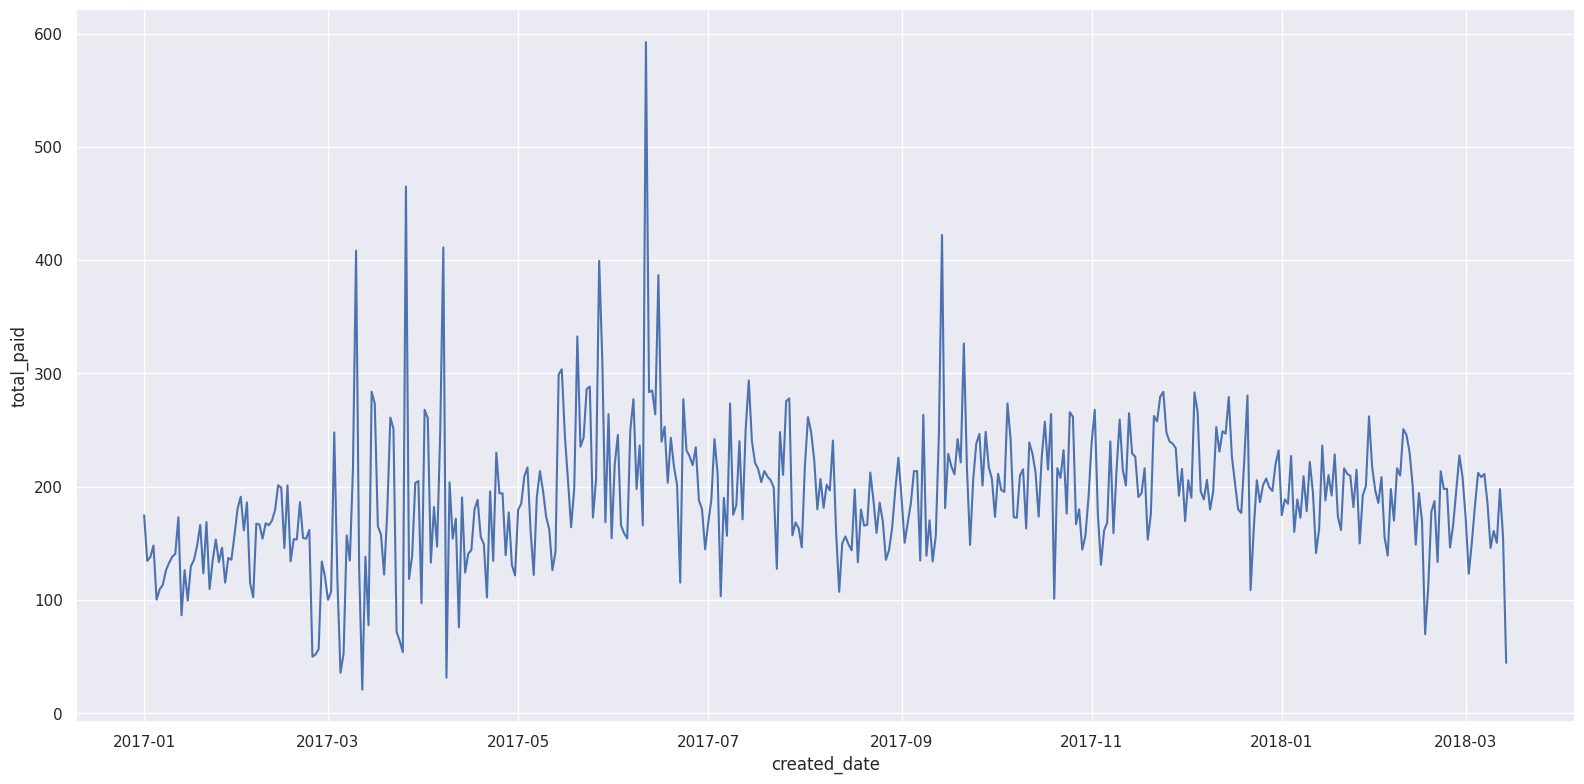

In [25]:
(
sns.relplot(kind="line",
            data=daily_average_df,
            x="created_date",
            y="total_paid",
            height=8,
            aspect=2)
);

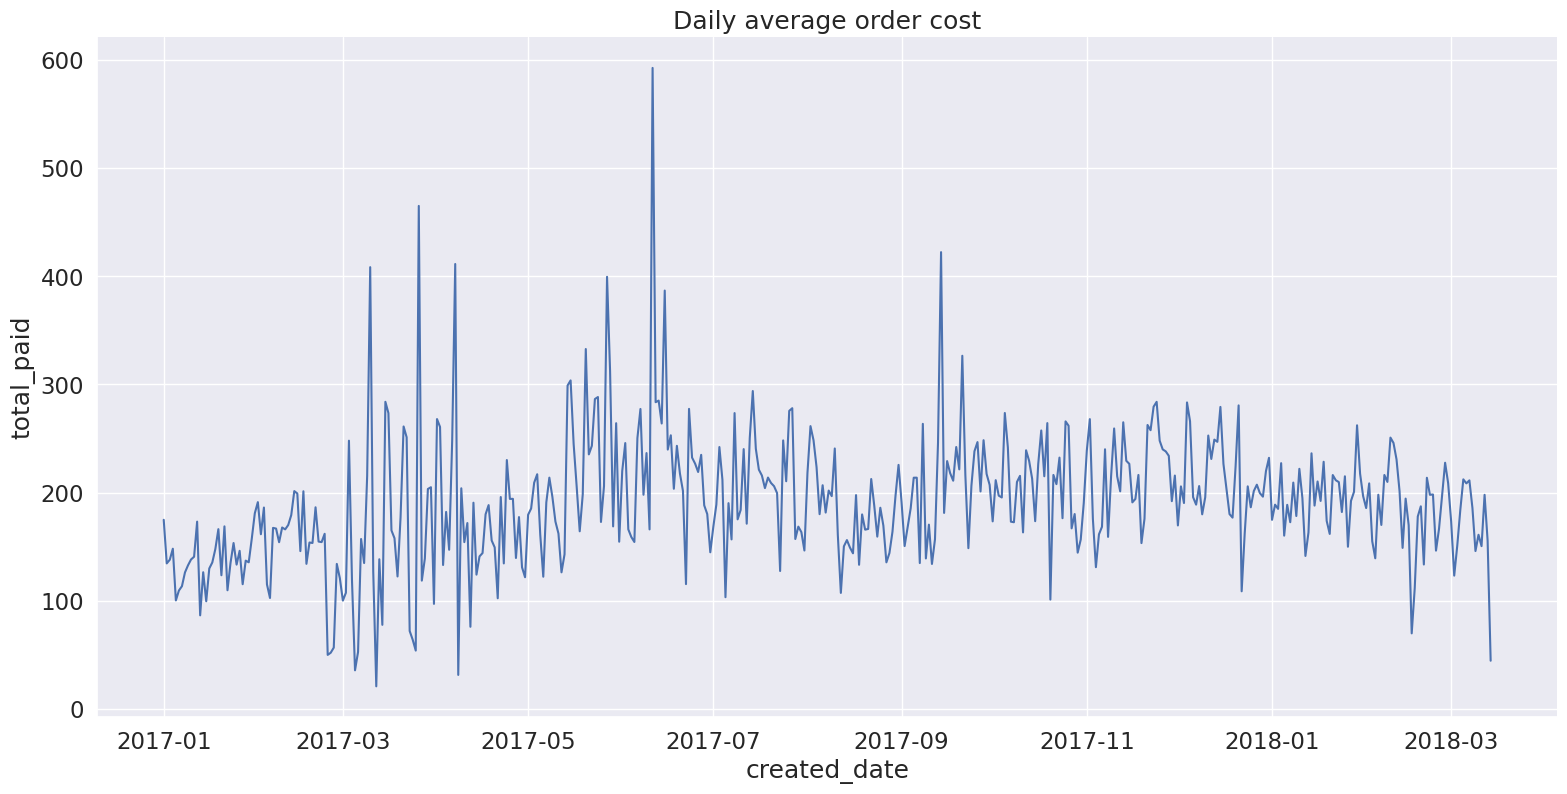

In [26]:
sns.set(font_scale=1.5)

(
sns.relplot(kind="line",
            data=daily_average_df,
            x="created_date",
            y="total_paid",
            height=8,
            aspect=2)
    .set(title="Daily average order cost")
);

## Challenge 4:
Make a bar plot for the top 10 products sold in January 2017 & the top 10 products sold in January 2018.

In [27]:
ol_df = orderlines_qu.copy()

In [28]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

In [29]:
january_df = ol_df.loc[ol_df["date"].dt.month == 1, :].copy()

In [30]:
january_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
47864,1593947,503440,0,1,ZAG0034,8.99,2018-01-31 23:55:51
47865,1593948,503441,0,1,WDT0318,249.99,2018-01-31 23:55:54
47866,1593956,503440,0,1,JMO0066,9.99,2018-01-31 23:57:00
47867,1593958,503440,0,1,MOX0019,3.71,2018-01-31 23:57:20


In [31]:
january_df["year"] = january_df["date"].dt.year

In [32]:
top_10_2_years_df = (
                    january_df
                    .groupby(["year", "sku"], as_index=False)
                    ["product_quantity"]
                    .sum()
                    .sort_values(by=["year", "product_quantity"], ascending=False)
                    .groupby("year").head(10)
                    )

In [33]:
top_10_2_years_df

,year,sku,product_quantity
3536,2018,ZAG0032,176
1858,2018,APP1190,112
2612,2018,MAT0010,103
3464,2018,WDT0183,89
2075,2018,BEL0270,61
1821,2018,APP0698,58
3254,2018,STA0016,56
3079,2018,SAM0074,50
2110,2018,BEL0371,49
2480,2018,KOO0007,42


In [34]:
top_10_2_years_names_df = top_10_2_years_df.merge(products_cl, 
                                                  how="left", 
                                                  on="sku")

In [35]:
top_10_2_years_names_df

,year,sku,product_quantity,name,desc,price,in_stock,type
0,2018,ZAG0032,176,Rugged Messenger Zagg iPad Keyboard Folio (201...,Keyboard folio and adjustable position for 97-...,99.99,1,12575403
1,2018,APP1190,112,IPhone AppleCare Protection Plan,Apple Care extended warranty iPhone.,70.00,1,1231
2,2018,MAT0010,103,Matias numeric keyboard + Spanish Aluminio Plata,Keyboard cable compatible with Mac features,69.99,1,13855401
3,2018,WDT0183,89,"Red 4TB WD 35 ""Mac PC hard drive and NAS",Western Digital hard drive designed for NAS 4T...,169.00,1,12655397
4,2018,BEL0270,61,PowerHouse Base Load Belkin Apple Watch and iP...,Lightning charger and connection support and m...,99.99,1,13615399
5,2018,APP0698,58,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230
6,2018,STA0016,56,Startech Mini DisplayPort to DisplayPort Cable...,Adapdator Cable Mini Display Port Male to Disp...,12.99,0,1325
7,2018,SAM0074,50,Samsung 850 EVO SSD Disk 500GB,SSD hard drive Mac and PC 25 inch 500GB SATA I...,179.99,1,12215397
8,2018,BEL0371,49,Belkin Impulse Line Slim Backpack MacBook,Backpack designed by Belkin for iPad and MacBo...,34.99,1,1392
9,2018,KOO0007,42,Koogeek Homekit Smart Plug socket with Siri vo...,Koogeek plug with Apple HomeKit technology and...,34.99,0,11905404


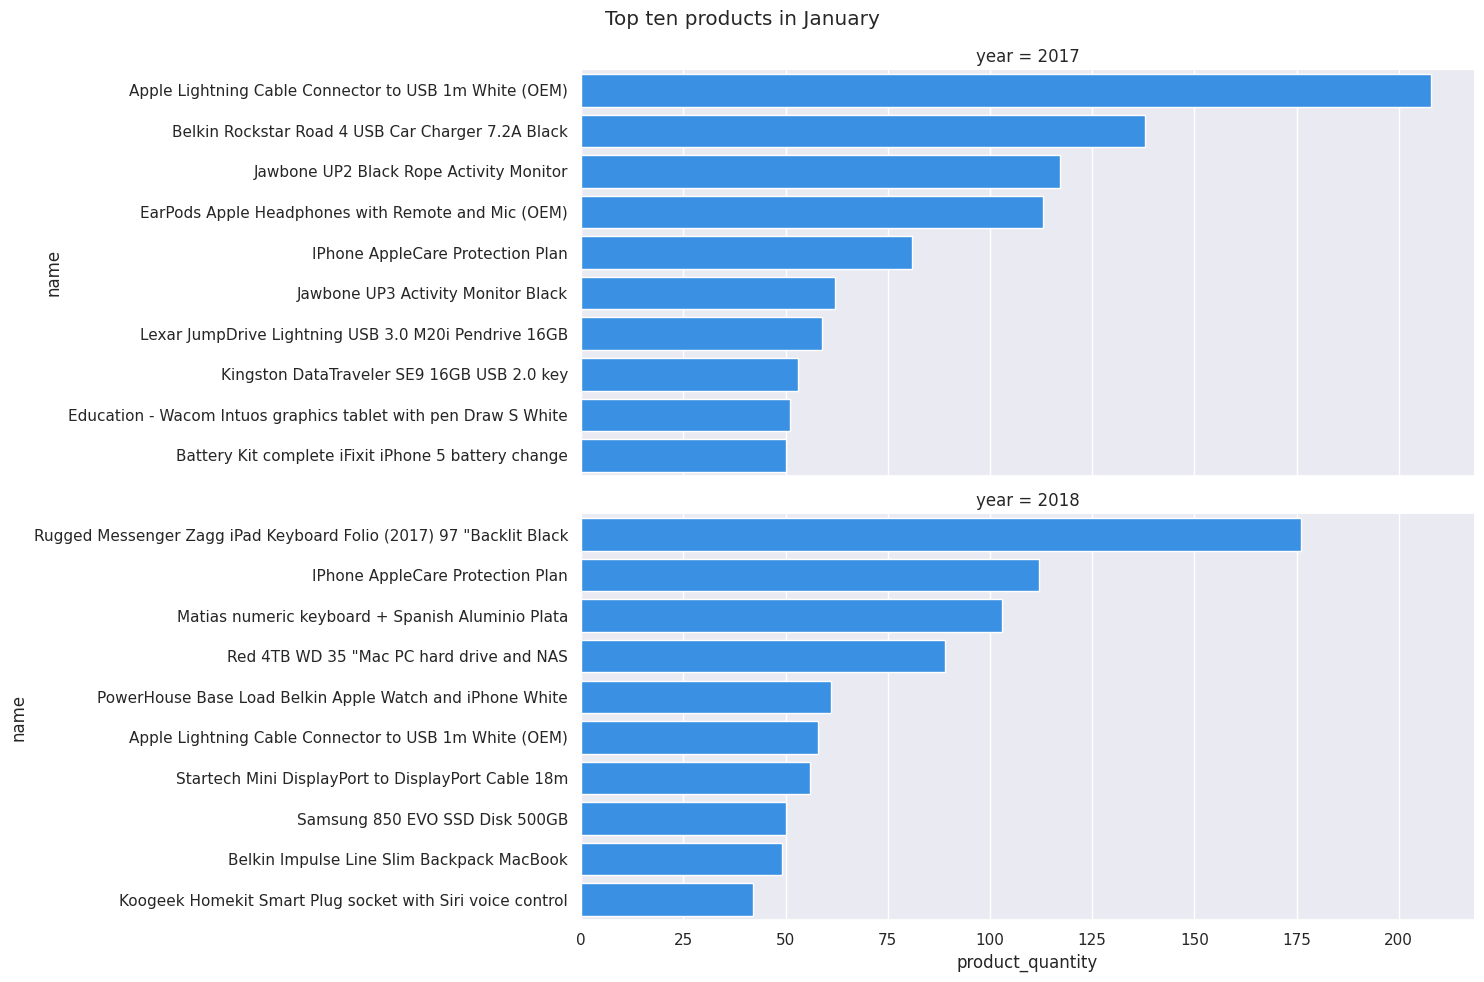

In [36]:
sns.set(font_scale=1)

(
sns.catplot(kind="bar", 
            data=top_10_2_years_names_df, 
            x="product_quantity", 
            y="name", 
            row="year", 
            color="dodgerblue",
            aspect=3,
            sharey=False)
    # when we have multiple plots, such as when using col or row, we need to use suptitle, and not the normal title
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
)

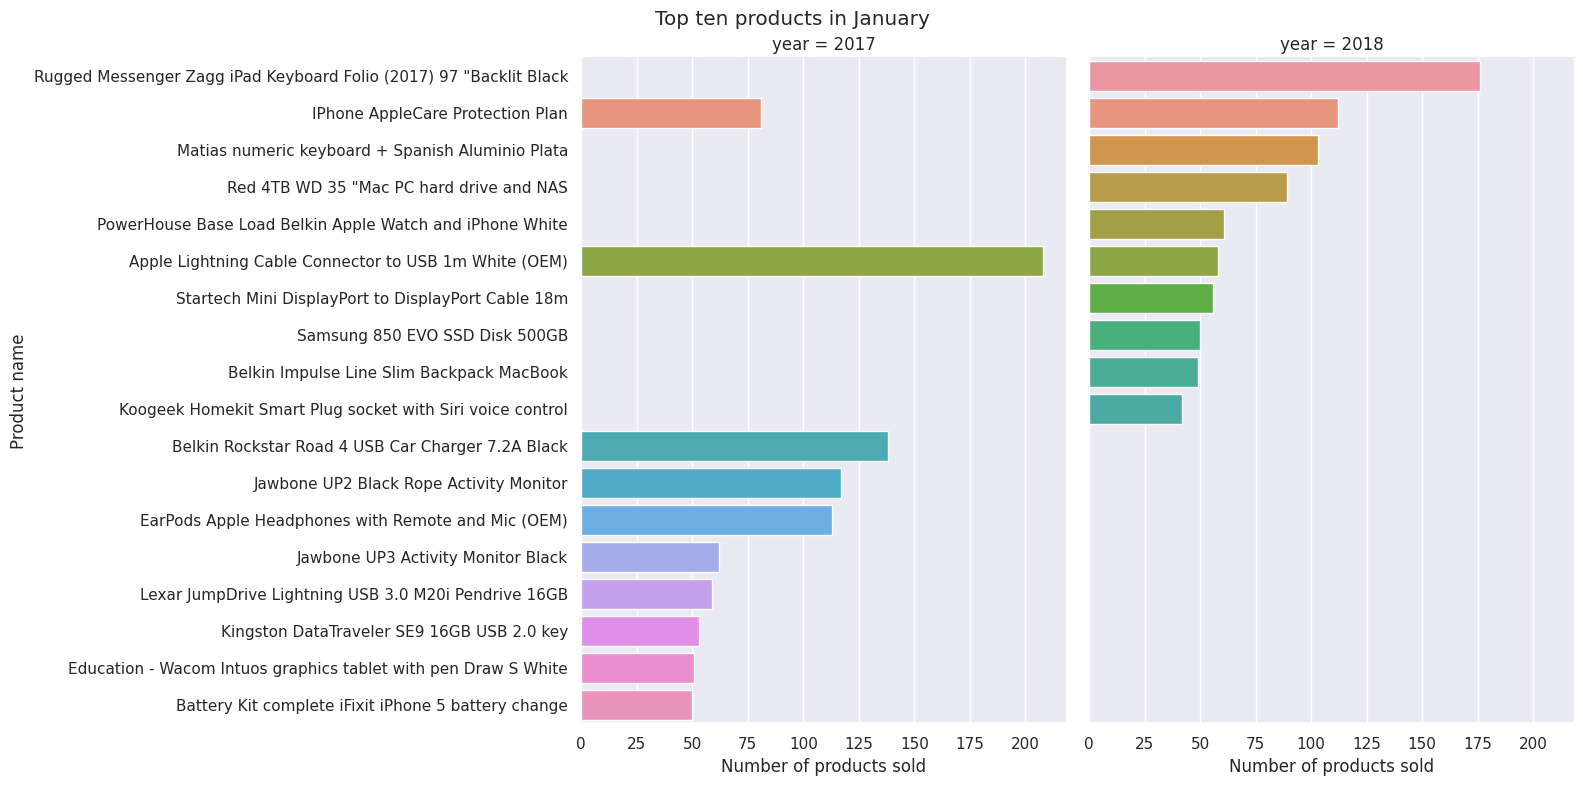

In [37]:
(
sns.catplot(data=top_10_2_years_names_df, 
                 x="product_quantity", 
                 y="name", 
                 col="year", 
                 kind="bar", 
                 height=8)
    .set_axis_labels("Number of products sold", 
                     "Product name")
    .figure.suptitle("Top ten products in January")
    .figure.subplots_adjust(top=.92)
)

## Bonus challenge:
This challenge is an extra. We will not go through the solution in class. It's here for those of you who finish early or are inquisitive.

Find the top 10 brands that have generated the most revenue in the snapshot we have. Show the daily revenue generated by each of these brands on a line plot, use a seperate line for each brand.

In [38]:
ol_df = orderlines_qu.copy()

In [39]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [40]:
ol_df["short"] = ol_df["sku"].str[:3]

In [41]:
ol_with_brands_df = ol_df.merge(brands, 
                                how="left", 
                                on="short")

In [42]:
top_10_brands_list = (
                      list(
                          ol_with_brands_df
                          .groupby("long", as_index=False)
                          ["unit_price"]
                          .sum()
                          .nlargest(10, "unit_price")
                          ["long"]
                          )
                      )

In [43]:
ol_with_brands_df["date"] = pd.to_datetime(ol_with_brands_df["date"])

In [44]:
ol_with_brands_df["date"] = ol_with_brands_df["date"].dt.date

In [45]:
daily_totals_df = (
                  ol_with_brands_df
                  .loc[ol_with_brands_df["long"].isin(top_10_brands_list), :]
                  .groupby(["date", "long"], as_index=False)
                  ["unit_price"]
                  .sum()
                  )

In [46]:
daily_totals_df

,date,long,unit_price
0,2017-01-01,Apple,2735.72
1,2017-01-01,Crucial,141.64
2,2017-01-01,LG,400.67
3,2017-01-01,LaCie,587.07
4,2017-01-01,OWC,741.91
...,...,...,...
3373,2018-03-13,Western Digital,471.98
3374,2018-03-14,Apple,1049.58
3375,2018-03-14,LaCie,108.23
3376,2018-03-14,OWC,222.97


In [47]:
daily_totals_df.rename(columns={"long": "Company"}, inplace=True)

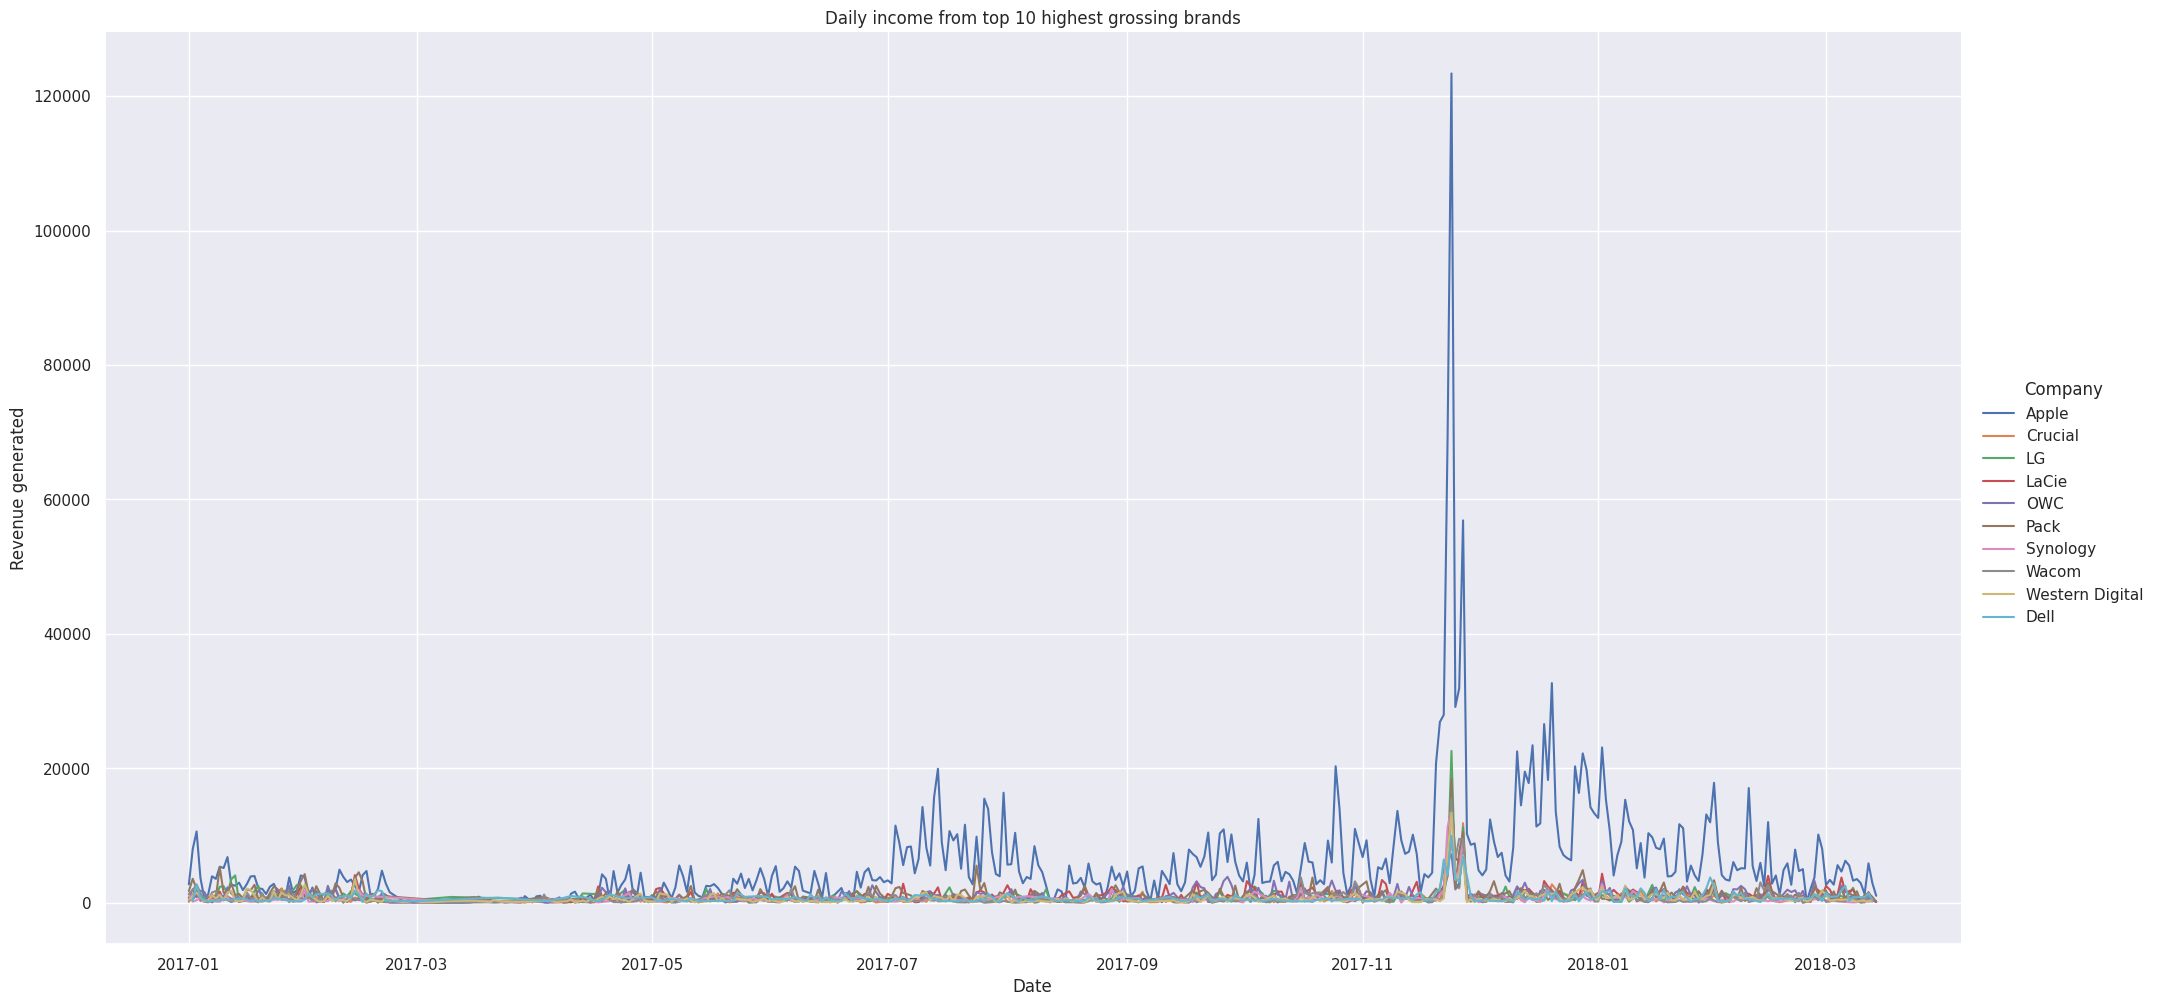

In [48]:
sns.set_theme(style="darkgrid")

(
sns.relplot(data = daily_totals_df,
            x="date",
            y="unit_price",
            hue="Company",
            kind="line",
            height= 10,
            aspect=2)
    .set_axis_labels("Date", 
                     "Revenue generated")
    .set(title="Daily income from top 10 highest grossing brands")
);